In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from pathlib import Path
from typing import (
    List, Union, Optional
)

import plotly.graph_objs as go
import plotly.express as px
import plotly

plotly.offline.init_notebook_mode()
from IPython.display import HTML

import ipywidgets as widgets
from ipywidgets import interact, interactive, Label

_RESULTS_CSV = Path("data/initial/all-data-subj-rows.csv")
_RESULTS_VAR_FULL_CSV = Path("/Colab Notebooks/results/var training/all-data-subj-rows.csv")
_RESULTS_CURVE_VAR_CSV = Path("/Colab Notebooks/results/curve_var_training/all-data-subj-rows.csv")

Output hidden; open in https://colab.research.google.com to view.

In [54]:
from google.colab import files
uploaded = files.upload()

## Functions - Selection Algorithms and helpers

Coefficient of Variation

In [ ]:
def cv(x:np.array) -> float:
    return np.std(x)/np.mean(x)

In [ ]:
def visualize_subject_curves(T:pd.DataFrame):
    
    ncols=5
    nrows=6
    
    fig, axes = plt.subplots(
        ncols=ncols, nrows=nrows, constrained_layout=True,
        figsize=(10,12) 
        )
    print(axes)
    
    for (i, j), ax in np.ndenumerate(axes):
        data = T.iloc[ncols*i + j]
        mu = np.mean(data)
        ax.xaxis.set_ticklabels([])
        ax.xaxis.set_ticks_position("none")
        ax.set_ylim([mu-5.0, mu+5.0])
        
        ax.plot(data)
        
    return None

In [ ]:
def algorithm_one(
    results_table:pd.DataFrame, return_candidates:bool=False
) -> Union[pd.DataFrame, Optional[dict]]:
    """
    results_table assumes subjects are rows in the dataframe 
    and come from a single cross validation fold; filtering of 
    the results table should happen before calling this function.
    """
    
    # Filter out unwanted columns    
    wip_table = results_table.drop(["subject_id", "cv_fold"], axis=1)
    
    # Identify candidate models
    models = wip_table[wip_table.idxmax(axis="columns")]
    
    # Calculate set of cvs
    cvs = {}
    best_cv = None
    best_name = None
    
    for idx, name in enumerate(models.columns):
        model_cv = cv(models.iloc[:,idx])
        cvs[name] = model_cv
        
        if not best_cv:
            best_cv = model_cv
            best_name = name
        elif model_cv < best_cv:
            best_cv = model_cv
            best_name = name
    
    # Return model with lowest cv (and optionally the cvs from each candidate)
    if return_candidates:
        return models[best_name].loc[:, ~models[best_name].columns.duplicated()], cvs
    
    return models[best_name].loc[:, ~models[best_name].columns.duplicated()]

In [ ]:
X = pd.read_csv(_RESULTS_CSV)
# Make a copy of table with only the data corresponding to the models at different values of t. Index value is subject id.
T = X.iloc[:,2:]

FileNotFoundError: ignored

In [ ]:
X_var_full = pd.read_csv(_RESULTS_VAR_FULL_CSV)
# Make a copy of table with only the data corresponding to the models at different values of t. Index value is subject id.
T_var_full = X_var_full.iloc[:,2:]

FileNotFoundError: ignored

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_curve_var = pd.read_csv(_RESULTS_CURVE_VAR_CSV)
# Make a copy of table with only the data corresponding to the models at different values of t. Index value is subject id.
T_curve_var = X_curve_var.iloc[:,2:]

FileNotFoundError: ignored

In [ ]:
# Check overall min

#np.min(T)

In [ ]:
X0 = X[X.cv_fold == 0]

In [ ]:
X0

,subject_id,cv_fold,0,0.0204,0.0408,0.0612,0.0816,0.102,0.1224,0.1429,0.1633,0.1837,0.2041,0.2245,0.2449,0.2653,0.2857,0.3061,0.3265,0.3469,0.3673,0.3878,0.4082,0.4286,0.449,0.4694,0.4898,0.5102,0.5306,0.551,0.5714,0.5918,0.6122,0.6327,0.6531,0.6735,0.6939,0.7143,0.7347,0.7551,0.7755,0.7959,0.8163,0.8367,0.8571,0.8776,0.898,0.9184,0.9388,0.9592,0.9796,1
0,Subj_0,0,88.1356,87.2881,84.7458,84.7458,86.4407,86.4407,86.4407,88.9831,88.9831,89.8305,89.8305,89.8305,88.9831,88.1356,88.1356,88.1356,87.2881,87.2881,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,87.2881,87.2881,86.4407,86.4407,86.4407,87.2881,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,87.2881,87.2881,86.4407,86.4407
1,Subj_1,0,85.7143,84.8739,85.7143,85.7143,85.7143,85.7143,85.7143,86.5546,86.5546,87.3950,89.0756,89.9160,89.9160,89.9160,89.9160,89.9160,89.9160,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,89.0756,89.0756,89.9160,89.0756,89.0756,88.2353,88.2353,87.3950
2,Subj_2,0,88.8889,88.8889,88.8889,89.8148,89.8148,89.8148,89.8148,89.8148,89.8148,89.8148,89.8148,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,91.6667,90.7407,90.7407,90.7407,90.7407,90.7407,89.8148,89.8148,89.8148,87.9630,87.9630
3,Subj_3,0,78.2609,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000
4,Subj_4,0,82.4561,82.4561,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,82.4561,82.4561,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,82.4561,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,81.5789,82.4561,82.4561,82.4561,82.4561,82.4561,82.4561,82.4561


## Curve Grid

Below, we chart the variation in performance as we traverse the curve from one trained model ($t=0$, left of chart) to the other ($t=1$, right of chart), by subject, starting with subject id $0$ in the top left and continuing to $29$ in the bottom right. The $y$ axis of each plot displays $10$ percentage points of accuracy variation, from $\mu -5$ to $\mu+5$, where $\mu$ is the mean accuracy for that subject.

Each row represents a single hold-5 out CV fold, which are calculated using an identical model (architecture and parameter values) set. Plots in different rows are computed based on different models.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80cbb43a58>


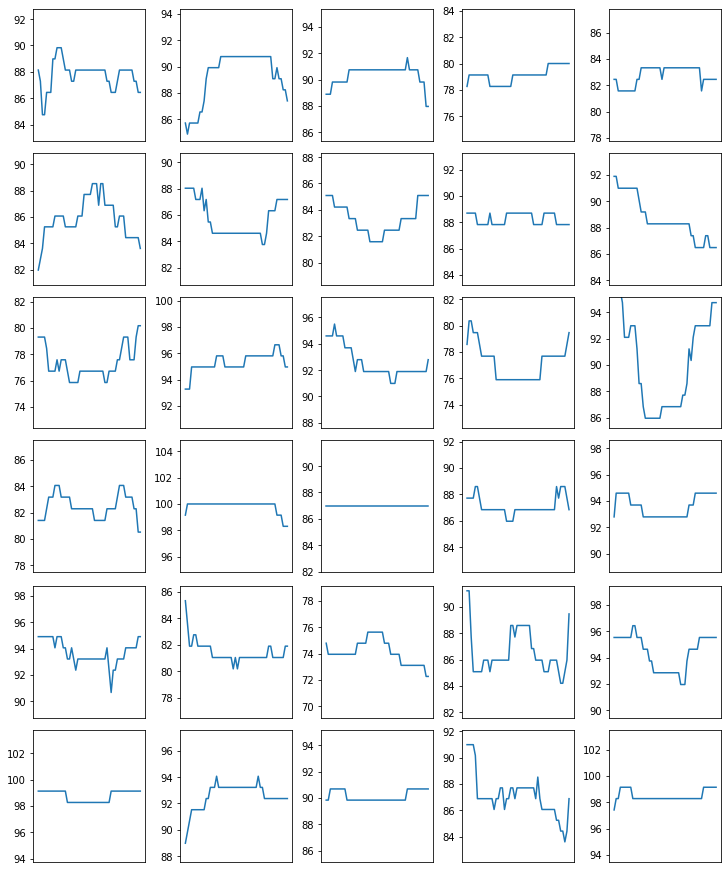

In [ ]:
visualize_subject_curves(T)

In [ ]:
X.head(5)

,subject_id,cv_fold,0,0.0204,0.0408,0.0612,0.0816,0.102,0.1224,0.1429,0.1633,0.1837,0.2041,0.2245,0.2449,0.2653,0.2857,0.3061,0.3265,0.3469,0.3673,0.3878,0.4082,0.4286,0.449,0.4694,0.4898,0.5102,0.5306,0.551,0.5714,0.5918,0.6122,0.6327,0.6531,0.6735,0.6939,0.7143,0.7347,0.7551,0.7755,0.7959,0.8163,0.8367,0.8571,0.8776,0.898,0.9184,0.9388,0.9592,0.9796,1
0,Subj_0,0,88.1356,87.2881,84.7458,84.7458,86.4407,86.4407,86.4407,88.9831,88.9831,89.8305,89.8305,89.8305,88.9831,88.1356,88.1356,88.1356,87.2881,87.2881,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,87.2881,87.2881,86.4407,86.4407,86.4407,87.2881,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,88.1356,87.2881,87.2881,86.4407,86.4407
1,Subj_1,0,85.7143,84.8739,85.7143,85.7143,85.7143,85.7143,85.7143,86.5546,86.5546,87.3950,89.0756,89.9160,89.9160,89.9160,89.9160,89.9160,89.9160,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,90.7563,89.0756,89.0756,89.9160,89.0756,89.0756,88.2353,88.2353,87.3950
2,Subj_2,0,88.8889,88.8889,88.8889,89.8148,89.8148,89.8148,89.8148,89.8148,89.8148,89.8148,89.8148,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,90.7407,91.6667,90.7407,90.7407,90.7407,90.7407,90.7407,89.8148,89.8148,89.8148,87.9630,87.9630
3,Subj_3,0,78.2609,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,78.2609,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,79.1304,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000,80.0000
4,Subj_4,0,82.4561,82.4561,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,81.5789,82.4561,82.4561,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,82.4561,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,83.3333,81.5789,82.4561,82.4561,82.4561,82.4561,82.4561,82.4561,82.4561


In [ ]:
@interact
def show_accuracy_for_fold(column='cv_fold', x=(0,4,1)):
    return X.loc[X[column] == x]

interactive(children=(Text(value='cv_fold', description='column'), IntSlider(value=2, description='x', max=4),…

In [ ]:
ncols=5
nrows=6
title=[]
for i in range(30):
    title.append("Subject {}".format(i))
    
title=np.asarray(title).reshape((nrows,ncols))

In [ ]:
best_points_initial=[
    [],
    [50,49,50,46,21,3],
    [42,4,50,11,28,4],
    [50,4,50,46,21,3],
    [33,21,46,38,21,43],
    [40,4,4,44,4,4]
]

In [ ]:
best_points_var_ful=[
    [],
    [3,49,1,43,29,1],
    [3,49,1,9,5,1],
    [3,39,7,41,5,3],
    [4,39,32,35,9,41],
    [48,39,5,48,5,3]
]


In [ ]:
best_points_var_curve=[
    [],
    [50,12,50,28,47,49],
    [6,12,2,10,20,2],
    [7,12,50,28,20,34],
    [19,40,5,36,17,18],
    [46,2,50,14,36,4]
]

In [ ]:
algorithms = ["Algorithm 1", "Algorithm 2", "Algorithm 3", "Algorithm 4", "Algorithm 5"]
algorithm_checkboxes = [widgets.Checkbox(value=False, description=algo) for algo in algorithms]
widget_algos= widgets.VBox(children = [Label('Display best points according to:'), widgets.HBox(children=algorithm_checkboxes)])

In [ ]:
def set_plot(subjects, folds, initial, variance_full, variance_curve):
    return subjects, folds, initial, variance_full, variance_curve;


  

In [ ]:
def scatter_plot(parameters, algorithm_checkboxes):
    
    subjects = parameters['subjects']
    folds= parameters['folds']
    initial = parameters['initial']
    variance_full = parameters['variance_full']
    variance_curve = parameters['variance_curve']

    ncols = subjects[1] - subjects[0]
    nrows = folds[1] - folds[0]
    fig = plotly.subplots.make_subplots(rows=nrows, cols=ncols,
                                       subplot_titles=list(np.concatenate(
                                                               title[folds[0]:folds[1],
                                                                     subjects[0]:subjects[1]])))
    
    arr = np.empty(shape=(nrows,ncols))
    for (i, j), ax in np.ndenumerate(arr):
        if initial:
            data1 = go.Scatter(x=T.columns, 
                   y=T.iloc[ncols*i + (j+subjects[0])], 
                   name='initial training', 
                   marker_color='blue',
                   legendgroup = 'initial training',
                   showlegend=False)
            if i==0 and j==0: 
                data1.update(data1, showlegend=True)
            
            fig.append_trace(data1, row=i+1, col=j+1)
            for alg in range(0, len(algorithm_checkboxes)):
              if algorithm_checkboxes[alg].value == True:
                data3 = go.Scatter(x=[T.columns[best_points_initial[alg+1][i]-1]], 
                               y=[T.iloc[ncols*i + (j+subjects[0]), 
                                                  best_points_initial[alg+1][i]-1]
                                 ],
                               name=str('initial best point ' + algorithm_checkboxes[alg].description),
                               legendgroup = str('initial best point ' + algorithm_checkboxes[alg].description),
                               opacity=0.8,
                               marker_symbol=200+alg,
                               showlegend=False,
                               text = algorithm_checkboxes[alg].description,
                               marker=dict(
                                        size=15,
                                        color=px.colors.qualitative.Dark2[alg], #set color equal to a variable
                                        showscale=False,
                                        line_width=2,
                                        line_color="midnightblue"
                                    )
                              )
                if i==0 and j==0:
                  data3.update(data3, showlegend=True)
                fig.append_trace(data3, row=i+1, col=j+1)
        if variance_full:    
            data2 = go.Scatter(x=T_var_full.columns, 
                   y=T_var_full.iloc[ncols*i + (j+subjects[0])],
                   name='full variance training',
                   marker_color='red',
                   legendgroup = 'full variance training',
                      showlegend=False)
            if i==0 and j==0: 
                data2.update(data2, showlegend=True)
        
            fig.append_trace(data2, row=i+1, col=j+1)
            
            for alg in range(0, len(algorithm_checkboxes)):
              if algorithm_checkboxes[alg].value == True:
                data4 = go.Scatter(x=[T_var_full.columns[best_points_var_ful[alg+1][i]-1]], 
                               y=[T_var_full.iloc[ncols*i + (j+subjects[0]), 
                                                  best_points_var_ful[alg+1][i]-1]
                                 ],
                               opacity=0.8,
                               name = str('full variance best point ' + algorithm_checkboxes[alg].description),
                               legendgroup=str('ful variance best point ' + algorithm_checkboxes[alg].description),
                               marker_symbol=200+alg,
                               showlegend=False,
                               text = algorithm_checkboxes[alg].description,
                               marker=dict(
                                        size=13,
                                        color=px.colors.qualitative.Safe[alg], #set color equal to a variable
                                        showscale=False,
                                        line_width=2,
                                        line_color="midnightblue"
                                    )
                              )
                if i==0  and j==0:
                  data4.update(data4, showlegend=True)  
                fig.append_trace(data4, row=i+1, col=j+1)         
        if variance_curve:    
              curve = go.Scatter(x=T_curve_var.columns, 
                               y=T_curve_var.iloc[ncols*i + (j+subjects[0])],
                               name='variance training on curve',
                               marker_color='#19D3F3',
                               legendgroup = 'variance training on curve',
                               showlegend=False)
              if i==0 and j==0: 
                curve.update(curve, showlegend=True)
        
              fig.append_trace(curve, row=i+1, col=j+1)
            
              for alg in range(0, len(algorithm_checkboxes)):
                if algorithm_checkboxes[alg].value == True:
                  best_point = go.Scatter(x=[T_curve_var.columns[best_points_var_curve[alg+1][i]-1]], 
                               y=[T_curve_var.iloc[ncols*i + (j+subjects[0]), 
                                                  best_points_var_curve[alg+1][i]-1]
                                 ],
                               opacity=0.8,
                               name = str('variance on the curve best point ' + algorithm_checkboxes[alg].description),
                               legendgroup=str('variance on the curve best point ' + algorithm_checkboxes[alg].description),
                               marker_symbol=200+alg,
                               showlegend=False,
                               text = algorithm_checkboxes[alg].description,
                               marker=dict(
                                        size=13,
                                        color=px.colors.qualitative.Vivid[alg], #set color equal to a variable
                                        showscale=False,
                                        line_width=2,
                                        line_color="midnightblue"
                                    )
                              )
                  if i==0  and j==0:
                    best_point.update(best_point, showlegend=True)  
                  fig.append_trace(best_point, row=i+1, col=j+1)
        
            
        h = 300*(i+1)
        fig.update_layout(height=h, width = 1500)

    return fig
    
  

In [ ]:
w = interactive(set_plot, subjects=widgets.IntRangeSlider(
                                        value=[0, 5],
                                        min=0,
                                        max=5,
                                        step=1,
                                        description='Subjects in the fold:',
                                        disabled=False,
                                        continuous_update=False,
                                        orientation='horizontal',
                                        readout=True,
                                        readout_format='d',
                                    ), 
                 folds=widgets.IntRangeSlider(
                                        value=[0, 6],
                                        min=0,
                                        max=6,
                                        step=1,
                                        description='Folds:',
                                        disabled=False,
                                        continuous_update=False,
                                        orientation='horizontal',
                                        readout=True,
                                        readout_format='d',
                                    ),
                initial = widgets.Checkbox(
                            value=True,
                            description='Initial training',
                            disabled=False
                        ),
                variance_full = widgets.Checkbox(
                            value=True,
                            description='Full variance training',
                            disabled=False,
                        ),
                variance_curve = widgets.Checkbox(
                            value=True,
                            description='Variance training on curve',
                            disabled=False,
                        )
                );

In [ ]:
display(w)
display(widget_algos)

interactive(children=(IntRangeSlider(value=(0, 5), continuous_update=False, description='Subjects in the fold:…

In [ ]:
fig = scatter_plot(w.kwargs, algorithm_checkboxes)
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.